In [62]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())

import numpy as np
import pylab as plt

from sklearn.metrics import accuracy_score


(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


### Part 0


These are the digits you were asked to classify with  the solutions. 

- What is your accuracy?
- Did it improve after you saw some of the other images?
- What are the digits a human is most likely to mislabel?

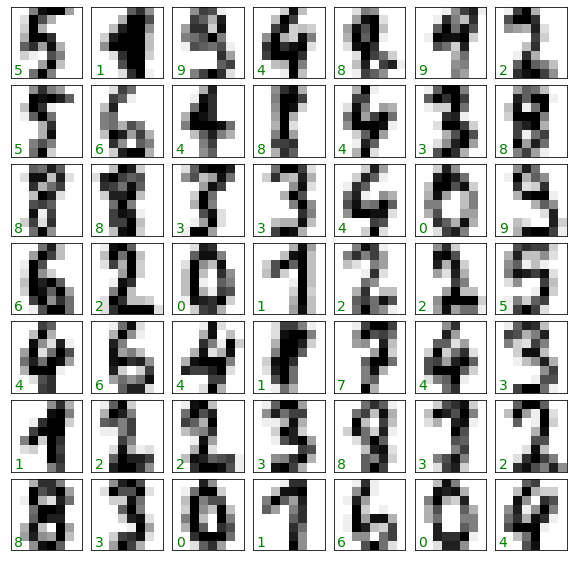

In [88]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(1) #### Placeholder. I'll say what the right seed is next time!
mychoices = np.random.choice(digits.images.shape[0],49)
np.random.seed()

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

### Part 1

Isomap

In [89]:
np.random.seed(42)

In [90]:
digits.data.shape

(1797, 64)

In [91]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
data_projected = iso.fit_transform(digits.data)
data_projected.shape

(1797, 2)

`Isomap` has turned our $1797\times 64$ dimensional data set into a $1797\times 2$ dimensional data set. This is much easier to visualize! Now let's see if that visualization is at all helpful.

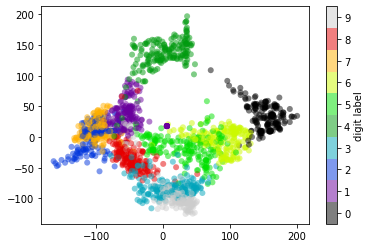

In [92]:
# Plot all of the data points in the two projected dimensions.  
# Color the points by their labels.
plt.scatter(data_projected[:,0], data_projected[:,1], 
            c=digits.target, edgecolor='none', alpha=0.5, 
            cmap=plt.cm.get_cmap('nipy_spectral', 10));

# Add the color bar
plt.colorbar(label='digit label', ticks=range(10))

# Make it clear which color goes with which label
plt.clim(-0.5, 9.5)

Oh that's nice. We see here that the digits are fairly well-separated in the parameter space. This tells us that a supervised classification algorithm should perform fairly well.

### Part 3

Classification

In [93]:
from sklearn.model_selection import train_test_split

# taking 80% of the data as a training set
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, 
                                                random_state=2, train_size=0.8)
print(Xtrain.shape, Xtest.shape)

(1437, 64) (360, 64)


In [94]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2', max_iter=2000,solver='sag')
clf.fit(Xtrain, ytrain)


LogisticRegression(max_iter=2000, solver='sag')

In [95]:
ypred = clf.predict(Xtest)
accuracy_score(ytest, ypred)

0.9472222222222222

In [96]:
ypredtrain = clf.predict(Xtrain)
accuracy_score(ytrain, ypredtrain)

1.0

[[31  0  0  0  1  0  0  0  0  0]
 [ 0 41  0  1  0  0  0  0  1  1]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  1  1  0]
 [ 0  0  0  0 31  0  0  0  3  1]
 [ 0  1  0  0  1 41  0  0  0  0]
 [ 0  1  0  0  0  0 33  0  1  0]
 [ 0  0  0  0  0  0  0 39  0  1]
 [ 0  0  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  0  1 25]]


/var/folders/zv/8t9z941x3q1gmp080mdw8k_h0000gn/T/ipykernel_2698/3822597679.py:3: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(confusion_matrix(ytest, ypred)),


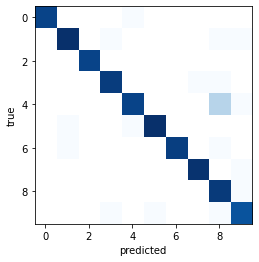

In [97]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, ypred))
plt.imshow(np.log(confusion_matrix(ytest, ypred)), 
           cmap='Blues', interpolation='nearest')
plt.ylabel('true')
plt.xlabel('predicted');

- So, that's $31$ "$0$"s were classified as "$0$", while one of them was classified as a "$4$", and no non-zero digits were so classified.


- $41$ "$1$"s were classified correctly, but one each were classified as a "$3$", "$8$", and "$9$".


- Moreover, one "$5$" and one "$6$" were classified as "$1$"s.


- And so on.


We can look at some of the outputs along with their predicted labels, making the bad labels red:

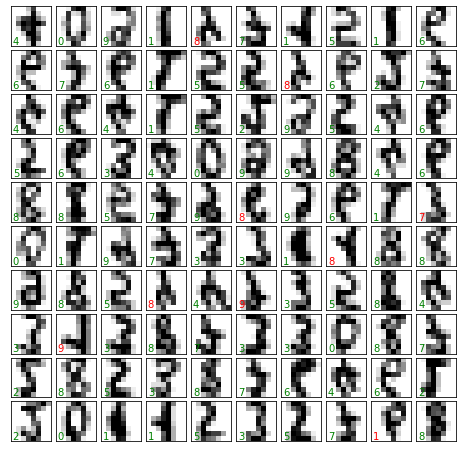

In [98]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(np.flipud(Xtest[i].reshape(8, 8)), cmap='binary')
    ax.text(0.05, 0.05, str(ypred[i]), transform=ax.transAxes, 
            color='green' if (ytest[i] == ypred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])

The interesting thing is that even with this simple logistic regression algorithm, some of the mislabeled cases are ones that we ourselves might get wrong!



# Performance on the dataset above

In [99]:
predchoice = clf.predict(digits.data[mychoices])
confusion_matrix(digits.target[mychoices], predchoice)

array([[4, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 5, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 7, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 7, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 8, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 4, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 7, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 3]])